In [1]:
# Jupyter Notebook with widget matplotlib plots
%matplotlib notebook
# Jupyter Lab with widget matplotlib plots
# %matplotlib widget 
# with Jupyter and Jupyter Lab but without widget matplotlib plots
# %matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import matplotlib
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.collections import PolyCollection
import pyicon as pyic
import cartopy.crs as ccrs

-----calc
sys glob os
numpy
netcdf
Done modules calc.
-----calc_xr
sys glob os
numpy
netcdf
xarray
Done modules calc.
-----tb
sys
json
numpy
scipy
netcdf datetime
matplotlib
mybreak
xarray
done xarray
-----IconData
-----plotting
-----view
-----calc
-----calc_xr
-----tb
-----IconData
-----plotting
-----view
-----quickplots
-----quickplots


# Create edges of primal and dual grid

In [6]:
fpath_tgrid = '/home/mpim/m300602/work/icon/grids/r2b8_oce_r0004/r2b8_oce_r0004_tgrid.nc'
fpath_data = '/work/bm1102/m211054/smtwave/zstar2/experiments/exp.ocean_era51h_zstar_r2b8_21070-SMT/outdata/exp.ocean_era51h_zstar_r2b8_21070-SMT_P1D_kin_20160416T000000Z.nc'

# lon_reg = [4,10]
# lat_reg = [53,57]

lon_reg = [0,12]
lat_reg = [52,58]

In [7]:
ds_tgrid = xr.open_dataset(fpath_tgrid)
clon = ds_tgrid.clon.data * 180./np.pi
clat = ds_tgrid.clat.data * 180./np.pi
vlon = ds_tgrid.vlon.data * 180./np.pi
vlat = ds_tgrid.vlat.data * 180./np.pi

ireg_v = (vlon>lon_reg[0]) & (vlon<=lon_reg[1]) & (vlat>lat_reg[0]) & (vlat<=lat_reg[1])
ireg_c = (clon>lon_reg[0]) & (clon<=lon_reg[1]) & (clat>lat_reg[0]) & (clat<=lat_reg[1])

In [8]:
%%time
clon_bnds, clat_bnds, vlon_bnds, vlat_bnds, cells_of_vertex = pyic.patch_plot_derive_bnds(ds_tgrid)

CPU times: user 4.63 s, sys: 3.14 s, total: 7.76 s
Wall time: 7.79 s


In [9]:
vlon_bnds_reg = vlon_bnds[ireg_v]
vlat_bnds_reg = vlat_bnds[ireg_v]
cells_of_vertex_reg = cells_of_vertex[ireg_v]
clon_bnds_reg = clon_bnds[ireg_c]
clat_bnds_reg = clat_bnds[ireg_c]

In [11]:
%%time
patches_c, patches_v = pyic.patch_plot_patches_from_bnds(clon_bnds_reg, clat_bnds_reg, vlon_bnds_reg, vlat_bnds_reg, cells_of_vertex_reg)

CPU times: user 639 ms, sys: 19 ms, total: 658 ms
Wall time: 645 ms


### Save grid

In [12]:
fpath_out = '/mnt/lustre01/work/mh0033/m300602/for_others/for_niklas/examp_plotting_dual_cell.nc'

In [13]:
ds_out = xr.Dataset()
ds_out['clon_bnds'] = clon_bnds
ds_out['clat_bnds'] = clat_bnds
ds_out['vlon_bnds'] = vlon_bnds
ds_out['vlat_bnds'] = vlat_bnds

In [14]:
ds_out

<xarray.Dataset>
Dimensions:    (cell: 3729001, nc: 6, nv: 3, vertex: 1882979)
Coordinates:
    vlon       (cell, nv) float64 1.278 1.274 1.27 1.278 ... 1.335 1.337 1.333
    vlat       (cell, nv) float64 1.258 1.26 1.258 ... -0.7877 -0.7898 -0.7899
Dimensions without coordinates: cell, nc, nv, vertex
Data variables:
    clon_bnds  (cell, nv) float64 73.23 73.0 72.77 73.23 ... 76.49 76.59 76.4
    clat_bnds  (cell, nv) float64 72.1 72.21 72.1 72.1 ... -45.13 -45.25 -45.26
    vlon_bnds  (vertex, nc) float64 73.0 73.23 73.46 73.46 ... 76.5 76.41 76.31
    vlat_bnds  (vertex, nc) float64 72.13 72.18 72.13 ... -45.3 -45.34 -45.3

In [15]:
print(f'Writing netcdf file {fpath_out}')
ds_out.to_netcdf(fpath_out)

Writing netcdf file /mnt/lustre01/work/mh0033/m300602/for_others/for_niklas/examp_plotting_dual_cell.nc


### Plot the grid

<IPython.core.display.Javascript object>


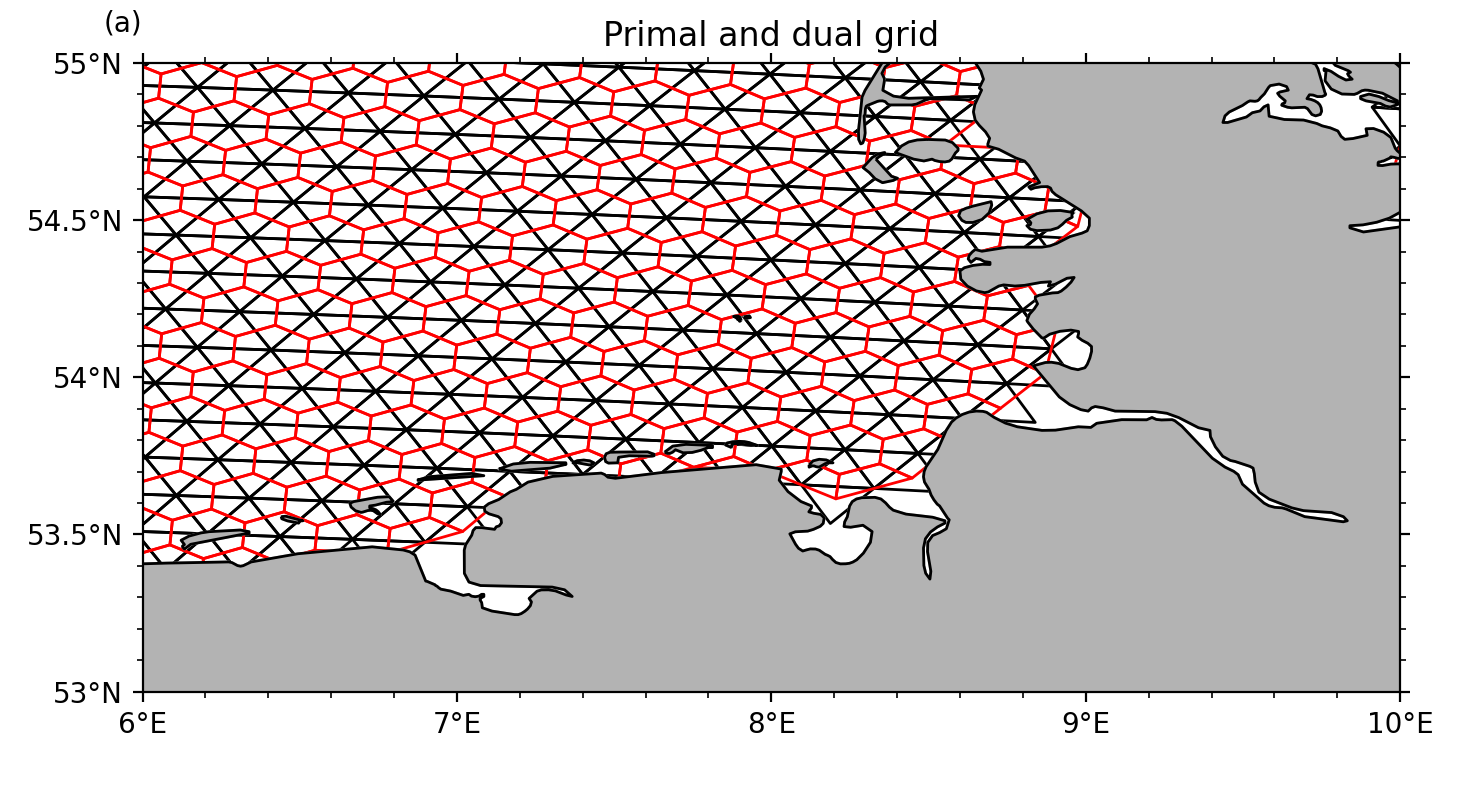

CPU times: user 125 ms, sys: 10 ms, total: 135 ms
Wall time: 129 ms


In [16]:
%%time

proj = ccrs.PlateCarree()
hca, hcb = pyic.arrange_axes(1,1, plot_cb=False, asp=0.5, fig_size_fac=2., sharex=False, projection=proj)
ii=-1


ii+=1; ax=hca[ii]; cax=hcb[ii]

pc = PatchCollection(patches_c, edgecolor='k', facecolor='none')
ax.add_collection(pc)

pv = PatchCollection(patches_v, edgecolor='r', facecolor='none')
ax.add_collection(pv)

ax.set_title('Primal and dual grid')


for ax in hca:
    pyic.plot_settings(ax, xlim=(6, 10), ylim=(53, 55))

## Load data

In [17]:
ds = xr.open_dataset(fpath_data)

vort = ds.vort[0,0,ireg_v]
kin = ds.kin[0,0,ireg_c]

<IPython.core.display.Javascript object>


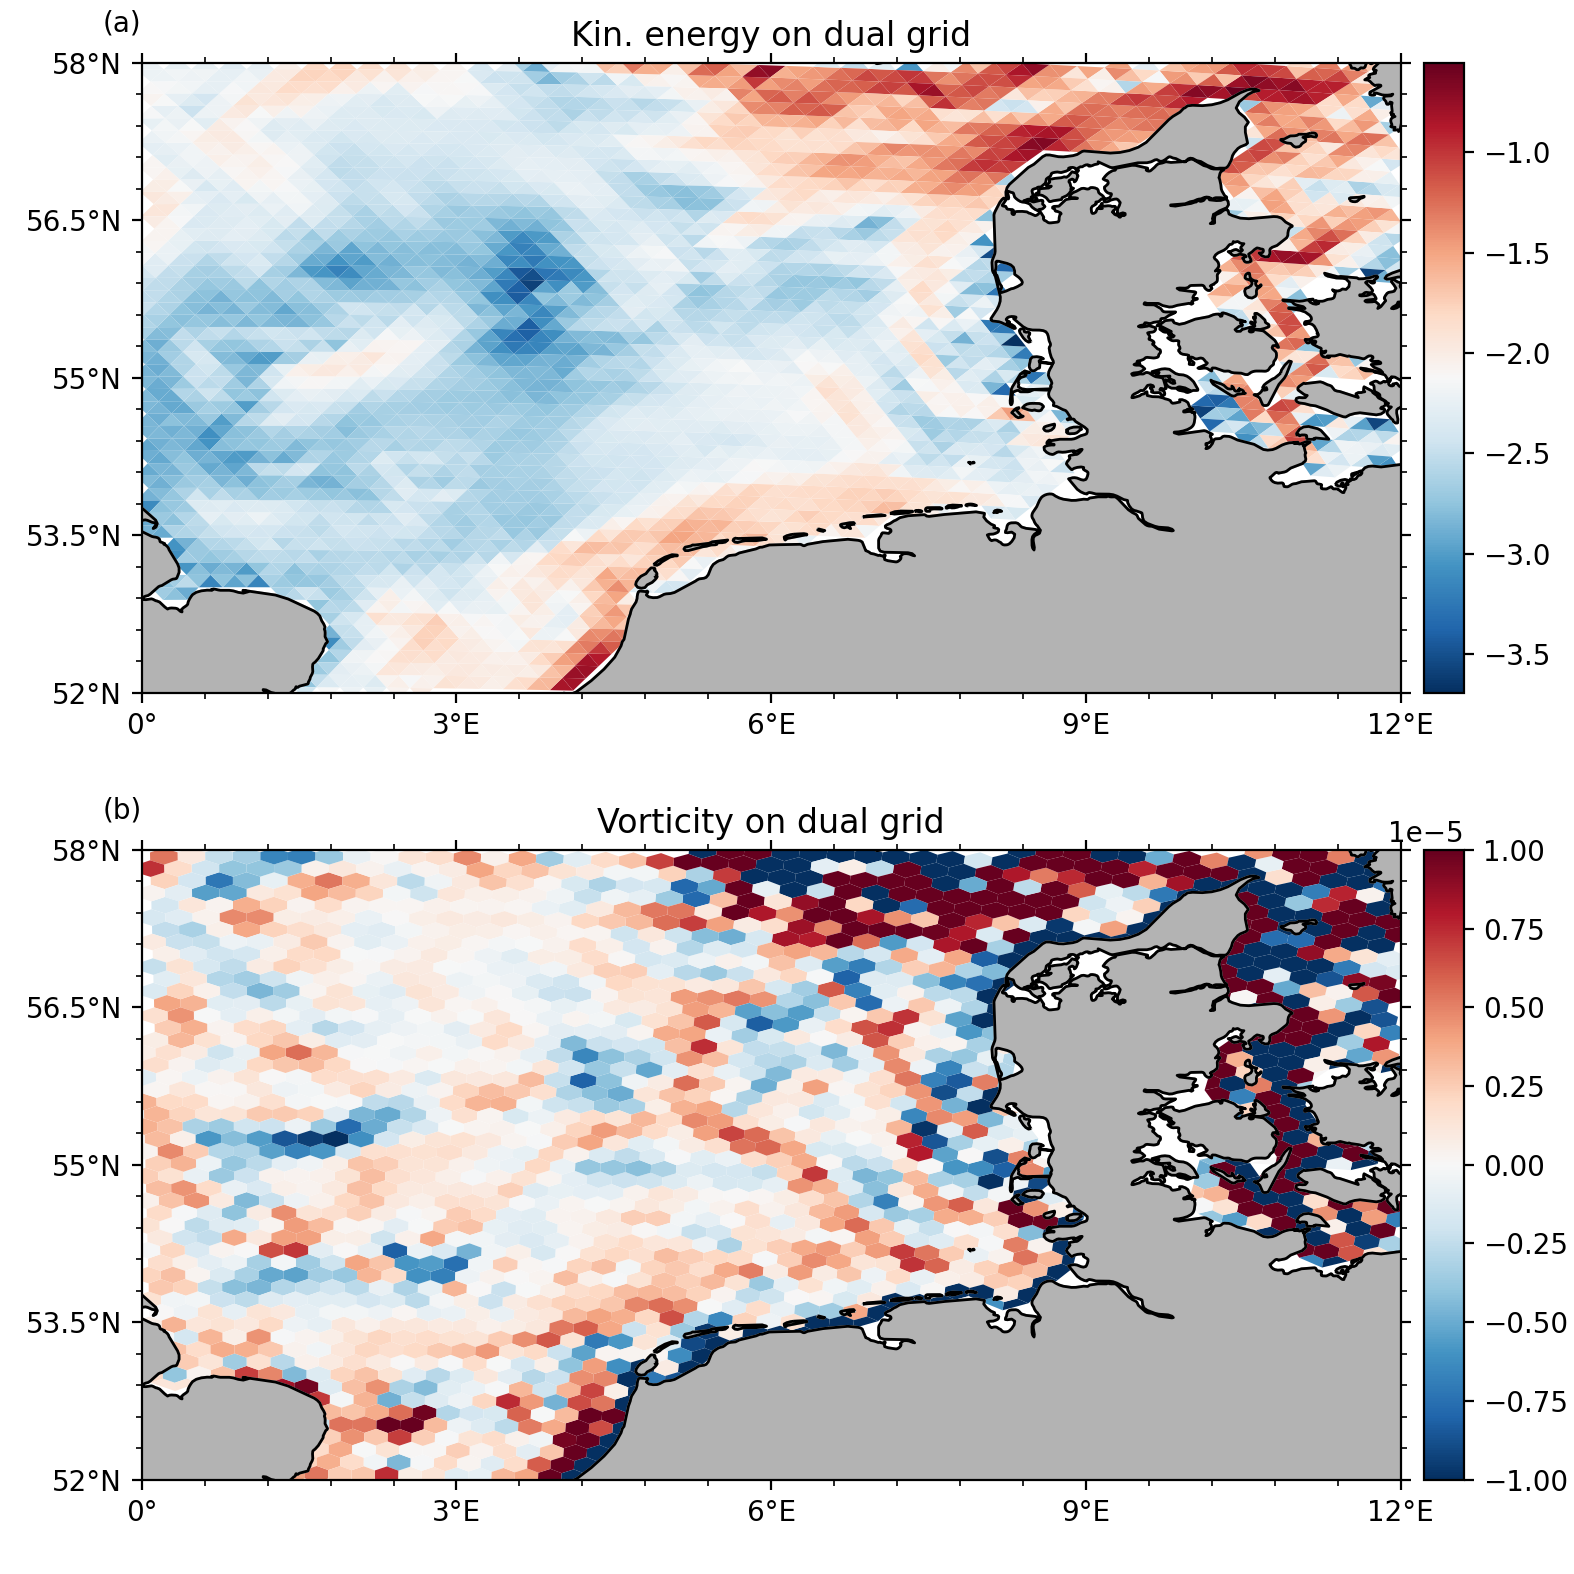

CPU times: user 685 ms, sys: 39 ms, total: 724 ms
Wall time: 838 ms


In [18]:
%%time
proj = ccrs.PlateCarree()
hca, hcb = pyic.arrange_axes(1,2, plot_cb=True, asp=0.5, fig_size_fac=2., sharex=False, projection=proj)
ii=-1

ii+=1; ax=hca[ii]; cax=hcb[ii]
p = pyic.patch_plot_shade(patches_c, kin, ax=ax, cax=cax, clim='auto', logplot=True)
ax.set_title('Kin. energy on dual grid')

ii+=1; ax=hca[ii]; cax=hcb[ii]
p = pyic.patch_plot_shade(patches_v, vort, ax=ax, cax=cax, clim=1e-5)
ax.set_title('Vorticity on dual grid')

for ax in hca:
    pyic.plot_settings(ax, xlim=lon_reg, ylim=lat_reg)